In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

In [5]:
# Loading dataset
df = pd.read_csv('student-mat.csv')

## Data Preparation- data cleaning and transformations

In [6]:
#Rows tell you the number of obs and columns tell you the number of features
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
print('INFO:')
print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (395, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     3

In [7]:
# Converting all binary non-numeric variables to numeric variables to allow for easy data processing

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0

In [8]:
# Converting all nominal non-numeric variables to numeric variables to allow for easy data processing

conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)

In [9]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob           int32
Fjob           int32
reason         int32
guardian       int32
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: week_alc, dtype: int64

0    321
1     74
Name: alc, dtype: int64
0    0.812658
1    0.187342
Name: alc, dtype: float64


Text(0.5, 1.0, 'Distribution of Heavy Drinkers VS Light drinkers')

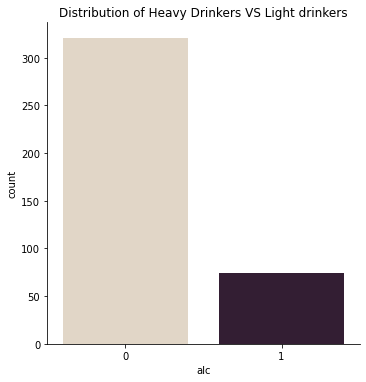

In [11]:
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
plt.title('Distribution of Heavy Drinkers VS Light drinkers')

In [12]:
# checking for Nan values
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

In [13]:
df[df['age']== 22]['age']

247    22
Name: age, dtype: int64

In [14]:
df.drop(labels = 279, inplace=True) #dropping age outlier
df[df['age']== 22]['age']# checking to see if the drop was successful

247    22
Name: age, dtype: int64

In [15]:
X_df = df.drop(columns = ['Dalc', 'Walc', 'week_alc', 'alc'], axis = 1) # grabs everything else but 'default column'
y = df['alc']
orig_feats = list(X_df.columns)
len(orig_feats)

31

Feature quantifying family stability 

In [16]:
df['stability'] = df['famrel'] * df['famsize']

In [17]:
print("Descriptive Statistics :", '\n', df['stability'].describe())
print("Correlation with target var 'alc consumption' :", '\n', df['stability'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.stability.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="stability", data=df,  ax = ax[0])
sns.barplot(x="stability", y = 'alc', data=df,  ax = ax[1])

Descriptive Statistics : 
 count     394
unique      6
top         4
freq      138
Name: stability, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

feature quantifying academic support network

In [18]:
df['academic_support'] = df.famsup + df.schoolsup  + df.higher 

In [19]:
print("Descriptive Statistics :", '\n', df['academic_support'].describe())
print("Correlation with target var 'alc consumption' :", '\n', df['academic_support'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.academic_support.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="academic_support", data=df,  ax = ax[0])
sns.barplot(x="academic_support",  y ='alc', data=df,  ax = ax[1])

Descriptive Statistics : 
 count     394
unique      4
top         2
freq      211
Name: academic_support, dtype: int64


AttributeError: 'float' object has no attribute 'shape'

In [20]:
df['idle'] = df.goout*df.freetime

Descriptive Statistics : 
 count    394.000000
mean      10.385787
std        5.569218
min        1.000000
25%        6.000000
50%        9.000000
75%       15.000000
max       25.000000
Name: idle, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.3498595207709327
percentage of data distrib : 
 9     0.177665
12    0.152284
6     0.144670
16    0.104061
4     0.083756
8     0.073604
20    0.060914
15    0.048223
25    0.040609
10    0.032995
2     0.032995
3     0.025381
5     0.012690
1     0.010152
Name: idle, dtype: float64


<AxesSubplot:xlabel='idle', ylabel='alc'>

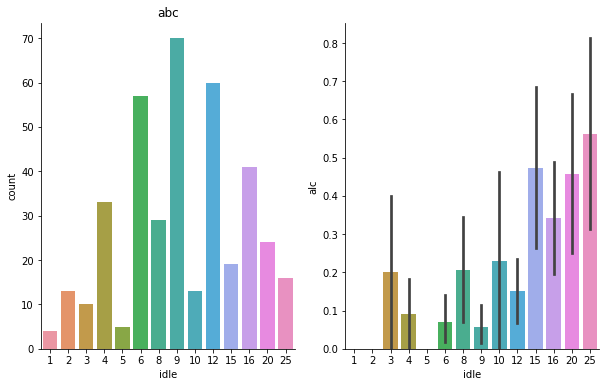

In [21]:
print("Descriptive Statistics :", '\n', df['idle'].describe())
print("Correlation with target variable 'alc consumption' :", '\n', df['idle'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.idle.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="idle", data=df,  ax = ax[0])
ax[0].set_title('abc')
sns.barplot(x="idle", y = 'alc', data=df,  ax = ax[1])

Average Grade

In [22]:
df['grade_avg'] = round((df.G1 + df.G2 + df.G3)/3, 2)

Descriptive Statistics : 
 count    394.000000
mean      10.680025
std        3.701570
min        1.330000
25%        8.330000
50%       10.670000
75%       13.330000
max       19.330000
Name: grade_avg, dtype: float64
Correlation with target alc consumption : 
 -0.11018361339182221


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grade_avg', ylabel='Density'>

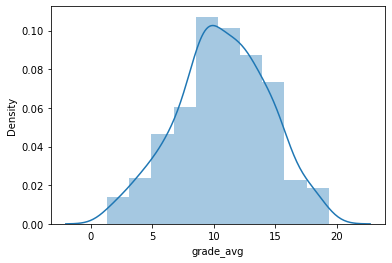

In [23]:
print("Descriptive Statistics :", '\n', df['grade_avg'].describe())
print("Correlation with target alc consumption :", '\n', df['grade_avg'].corr(df['alc']))

sns.despine(right=True)
sns.distplot(a=df["grade_avg"],bins=10, kde=True, hist=True)

# plt.figure(figsize=(5,8))
# df.boxplot(column='grade_avg', by = 'alc')

In [24]:
heavy = df.loc[df['alc'] == 1]
light = df.loc[df['alc'] == 0]
grades_heavy = df.grade_avg
grades_light = df.grade_avg

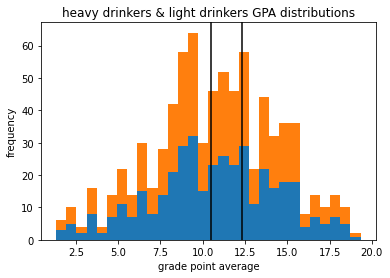

In [25]:
plt.hist([grades_heavy,grades_light], bins = 30, stacked = True)
plt.xlabel('grade point average')
plt.ylabel('frequency')
plt.title('heavy drinkers & light drinkers GPA distributions')
plt.axvline(x = 10.5, color = 'k')
plt.axvline(x = 12.33, color = 'k')
plt.savefig('gpahist.png')
plt.show();

In [26]:
df['delinquency'] = (df['failures']) * df['absences']

Descriptive Statistics : 
 count    394.000000
mean       2.291878
std        7.129381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: delinquency, dtype: float64
Correlation with target variable 'alc consumption' : 
 0.18289804662205839
percentage of data distrib : 
 0     0.855330
4     0.012690
6     0.012690
12    0.012690
16    0.010152
2     0.010152
8     0.010152
15    0.007614
28    0.007614
22    0.005076
14    0.005076
30    0.005076
20    0.005076
48    0.005076
24    0.005076
18    0.005076
44    0.002538
13    0.002538
25    0.002538
9     0.002538
7     0.002538
19    0.002538
38    0.002538
3     0.002538
40    0.002538
10    0.002538
Name: delinquency, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delinquency'>

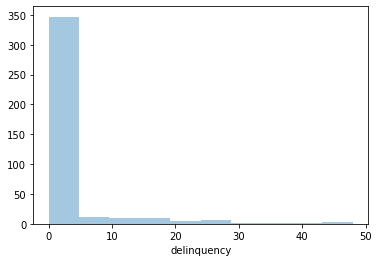

In [27]:
print("Descriptive Statistics :", '\n', df['delinquency'].describe())
print("Correlation with target variable 'alc consumption' :", '\n', df['delinquency'].corr(df['alc']))
print("percentage of data distrib :", '\n', df.delinquency.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["delinquency"],bins=10, kde = False ,hist=True)

In [28]:
print(df.shape)

print(df.columns)

(394, 40)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'week_alc', 'alc',
       'stability', 'academic_support', 'idle', 'grade_avg', 'delinquency'],
      dtype='object')


In [29]:
dummy1 = pd.get_dummies(df['Medu'],drop_first= True, prefix='Medu')
dummy2 = pd.get_dummies(df['Fedu'],drop_first= True, prefix='Fedu')
dummy3 = pd.get_dummies(df['Mjob'],drop_first= True, prefix='Mjob')
dummy4 = pd.get_dummies(df['Fjob'],drop_first= True, prefix='Fjob')
dummy5 = pd.get_dummies(df['reason'],drop_first= True, prefix='reason')
dummy6 = pd.get_dummies(df['guardian'],drop_first= True, prefix='guardian')
dummy7 = pd.get_dummies(df['traveltime'],drop_first= True, prefix='traveltime')
dummy8 = pd.get_dummies(df['studytime'],drop_first= True, prefix='studytime')
dummy9 = pd.get_dummies(df['failures'],drop_first= True, prefix = 'failures')
dummy10 = pd.get_dummies(df['famrel'],drop_first= True, prefix='famrel')
dummy11 = pd.get_dummies(df['freetime'],drop_first= True, prefix='freetime')
dummy12 = pd.get_dummies(df['goout'],drop_first= True, prefix="goout")
dummy13 = pd.get_dummies(df['health'],drop_first= True, prefix='health')

In [30]:
new_feats = ['grade_avg', 'academic_support', 'stability', 'idle', 'delinquency']
dummy_feats = ['Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures','famrel', 'freetime', 'goout','health']

df.drop(columns = ['week_alc', 'Dalc', 'Walc', 'alc'], axis = 1, inplace = True)

In [31]:
df_list = [df, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, 
           dummy8, dummy9, dummy10, dummy11, dummy12, dummy13]


In [32]:
for df in df_list:
    print(df.shape)

(394, 36)
(394, 4)
(394, 4)
(394, 4)
(394, 4)
(394, 3)
(394, 2)
(394, 3)
(394, 3)
(394, 3)
(394, 4)
(394, 4)
(394, 4)
(394, 4)


In [33]:
X = pd.concat(df_list, axis = 1)

In [34]:
print(X.shape)
print(y.shape)

(394, 82)
(394,)


### Train Test Split

In [35]:
#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=150, test_size=0.2)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (315, 82) Target:  (315,)
Test set - Features:  (79, 82) Target:  (79,)
0    0.812698
1    0.187302
Name: alc, dtype: float64
0    0.810127
1    0.189873
Name: alc, dtype: float64


In [36]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [37]:
# separate minority and majority classes
light_drinker = training[training.alc==0]
heavy_drinker = training[training.alc==1]

# Get a class count to understand the class imbalance.
print('light drinker count: '+ str(len(light_drinker)))
print('heavy drinker count: '+ str(len(heavy_drinker)))

light drinker count: 256
heavy drinker count: 59


In [38]:
from sklearn.utils import resample

In [39]:
# upsample minority
heavy_drinker_upsampled = resample(heavy_drinker,
                          replace=True, # sample with replacement
                          n_samples=len(light_drinker), # match number in majority class
                          random_state=23) # reproducible results
heavy_drinker_upsampled.shape

(256, 83)

In [40]:
# combine majority and upsampled minority
upsampled = pd.concat([light_drinker, heavy_drinker_upsampled])

# check new class counts
upsampled.alc.value_counts()

1    256
0    256
Name: alc, dtype: int64

In [41]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.alc
X_train_up = upsampled.drop(columns = 'alc', axis=1)
X_train_up.drop(columns = dummy_feats, axis=1, inplace=True)
X_train_up.shape

# print(y_train_u.value_counts(normalize = True))
# print(X_train_u.value_counts(normalize = True))

(512, 69)

# Feature Selection

In [42]:
print(len(orig_feats))
print(len(new_feats))
print(len(dummy_feats))
print(X_train_up.shape)
print(y_train_up.shape)

31
5
13
(512, 69)
(512,)


### Select Kbest 10

In [43]:
#setting parameters to choose the best 10 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=10) #setting parameters to choose the best 10 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb10 = X_train_up[selected_columns]
X_test_kb10 = X_test[selected_columns]
print(X_train_kb10.shape, X_test_kb10.shape)

(512, 10) (79, 10)


### Select Kbest 15

In [44]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=15) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb15 = X_train_up[selected_columns]
X_test_kb15 = X_test[selected_columns]

### Select Kbest 20

In [45]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=20) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb20 = X_train_up[selected_columns]
X_test_kb20 = X_test[selected_columns]

### Select Kbest 25

In [46]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=25) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb25 = X_train_up[selected_columns]
X_test_kb25 = X_test[selected_columns]

### Select Kbest 30

In [47]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=30) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb30 = X_train_up[selected_columns]
X_test_kb30 = X_test[selected_columns]

### Select Kbest 35

In [48]:
#setting parameters to choose the best 50 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=35) #setting parameters to choose the best 50 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train_kb35 = X_train_up[selected_columns]
X_test_kb35 = X_test[selected_columns]

# Models

### 1. BASELINE Model

In [49]:
lr1 = LogisticRegression(solver='liblinear', random_state=150)

lr1.fit(X_train[orig_feats], y_train)

y_pred_test = lr1.predict(X_test[orig_feats])
y_pred_train = lr1.predict(X_train[orig_feats])

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train, y_pred_train))

Test Accuracy score:  0.810126582278481
Train Accuracy score:  0.8920634920634921
Test F1 score:  0.3478260869565218
Train F1 score:  0.6530612244897959
Test Recall score:  0.26666666666666666
Train Recall score:  0.5423728813559322


In [50]:
results = {}

results['1.lr_baseline'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                            round(metrics.f1_score(y_test, y_pred_test),4), 
                          round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667)}

#### Removing the dummied features from the train and test sets

In [51]:
X_train1 = X_train.drop(columns = dummy_feats, axis = 1)
X_test1 = X_test.drop(columns = dummy_feats, axis = 1)

### Scaling train and test sets

In [52]:
scaler1 = MinMaxScaler()  
scaler1.fit(X_train1)
# Scaling Imbalanced data
X_train_scaleI = scaler1.transform(X_train1)  
X_test_scale = scaler1.transform(X_test1)

#Scaling upsampled data
scaler2 = MinMaxScaler()  
scaler2.fit(X_train_up)

X_train_scaleu = scaler2.transform(X_train_up)  


In [53]:
print(X_train.shape) # All features train set
print(X_test.shape) # All features test set

print(X_train1.shape) #Removed dummied features
print(X_test1.shape) # Removed dummied features

print(X_train_up.shape) #Upsampled train set and no dummied vars
print(y_train_up.shape)

print(X_train_scaleI.shape) # Scaled Imbalanced X_train1 set

print(X_train_scaleu.shape) # Scaled upsampled X_train_up set
print(X_test_scale.shape) # Scaled X_test1 set

print(y_test.shape)

(315, 82)
(79, 82)
(315, 69)
(79, 69)
(512, 69)
(512,)
(315, 69)
(512, 69)
(79, 69)
(79,)


### 2.Logistic Regression with X_train_up (Upsampled Unscaled Train set)

In [54]:
upsampled_lr = LogisticRegression(solver='liblinear')


upsampled_lr.fit(X_train_up, y_train_up)


upsampled_pred_test = upsampled_lr.predict(X_test1)
upsampled_pred_train = upsampled_lr.predict(X_train_up)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upsampled_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, upsampled_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, upsampled_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, upsampled_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, upsampled_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, upsampled_pred_train))

Test Accuracy score:  0.7215189873417721
Train Accuracy score:  0.900390625
Test F1 score:  0.47619047619047616
Train F1 score:  0.9050279329608939
Test Recall score:  0.6666666666666666
Train Recall score:  0.94921875


In [55]:
results['2. lr_upsampled'] = (round(metrics.accuracy_score(y_test, upsampled_pred_test),4), 
                           round(metrics.f1_score(y_test, upsampled_pred_test),4),
                          round(metrics.recall_score(y_test, upsampled_pred_test)))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1)}

### 3. Logistic Regression with X_train_up (Upsampled and Scaled Train set)

In [56]:
upscaled_lr = LogisticRegression(solver='liblinear')


upscaled_lr.fit(X_train_scaleu, y_train_up)


upscaled_pred_test = upsampled_lr.predict(X_test_scale)
upscaled_pred_train = upsampled_lr.predict(X_train_scaleu)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, upscaled_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, upscaled_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, upscaled_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, upscaled_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, upscaled_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, upscaled_pred_train))

Test Accuracy score:  0.7215189873417721
Train Accuracy score:  0.75
Test F1 score:  0.35294117647058826
Train F1 score:  0.6893203883495146
Test Recall score:  0.4
Train Recall score:  0.5546875


In [57]:
results['3.  lr_upscaled'] = (round(metrics.accuracy_score(y_test, upscaled_pred_test),4), 
                           round(metrics.f1_score(y_test, upscaled_pred_test),4),
                          round(metrics.recall_score(y_train_up, upscaled_pred_train),4))
results


{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547)}

### 4. Logistic Regression with K best 10

In [58]:
kb10_lr = LogisticRegression(solver='liblinear')


kb10_lr.fit(X_train_kb10, y_train_up)


kb10_pred_test = kb10_lr.predict(X_test_kb10)
kb10_pred_train = kb10_lr.predict(X_train_kb10)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb10_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb10_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb10_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb10_pred_train))

Test Accuracy score:  0.7215189873417721
Train Accuracy score:  0.783203125
Test F1 score:  0.45
Train F1 score:  0.7730061349693251
Test Recall score:  0.6
Train Recall score:  0.73828125


In [59]:
results['4. lr_kb10'] = (round(metrics.accuracy_score(y_test, kb10_pred_test),4), 
                           round(metrics.f1_score(y_test, kb10_pred_test),4),
                     round(metrics.recall_score(y_test, kb10_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6)}

### 5. Logistic Regression with K best 15

In [60]:
kb15_lr = LogisticRegression(solver='liblinear')

kb15_lr.fit(X_train_kb15, y_train_up)


kb15_pred_test = kb15_lr.predict(X_test_kb15)
kb15_pred_train = kb15_lr.predict(X_train_kb15)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb15_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb15_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb15_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb15_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb15_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb15_pred_train))

Test Accuracy score:  0.6835443037974683
Train Accuracy score:  0.833984375
Test F1 score:  0.3902439024390244
Train F1 score:  0.8393194706994329
Test Recall score:  0.5333333333333333
Train Recall score:  0.8671875


In [61]:
results['5. lr_kb15'] = (round(metrics.accuracy_score(y_test, kb15_pred_test),4), 
                           round(metrics.f1_score(y_test, kb15_pred_test),4),
                     round(metrics.recall_score(y_test, kb15_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333)}

### 6. Logistic Regression with K best 20

In [62]:
kb20_lr = LogisticRegression(solver='liblinear')

kb20_lr.fit(X_train_kb20, y_train_up)


kb20_pred_test = kb20_lr.predict(X_test_kb20)
kb20_pred_train = kb20_lr.predict(X_train_kb20)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb20_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb20_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb20_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb20_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb20_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb20_pred_train))

Test Accuracy score:  0.7088607594936709
Train Accuracy score:  0.818359375
Test F1 score:  0.4102564102564102
Train F1 score:  0.8208092485549134
Test Recall score:  0.5333333333333333
Train Recall score:  0.83203125


In [63]:
results['6.lr_kb20'] = (round(metrics.accuracy_score(y_test, kb20_pred_test),4), 
                           round(metrics.f1_score(y_test, kb20_pred_test),4),
                     round(metrics.recall_score(y_test, kb20_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333)}

### 7. Logistic Regression with K best 25

In [64]:
kb25_lr = LogisticRegression(solver='liblinear')

kb25_lr.fit(X_train_kb25, y_train_up)


kb25_pred_test = kb25_lr.predict(X_test_kb25)
kb25_pred_train = kb25_lr.predict(X_train_kb25)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb25_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb25_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb25_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb25_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb25_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb25_pred_train))

Test Accuracy score:  0.6582278481012658
Train Accuracy score:  0.83984375
Test F1 score:  0.37209302325581395
Train F1 score:  0.8416988416988418
Test Recall score:  0.5333333333333333
Train Recall score:  0.8515625


In [65]:
results['7. lr_kb25'] = (round(metrics.accuracy_score(y_test, kb25_pred_test),4), 
                           round(metrics.f1_score(y_test, kb25_pred_test),4),
                     round(metrics.recall_score(y_test, kb25_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333)}

### 8. Logistic Regression with K best 30

In [66]:
kb30_lr = LogisticRegression(solver='liblinear')

kb30_lr.fit(X_train_kb30, y_train_up)


kb30_pred_test = kb30_lr.predict(X_test_kb30)
kb30_pred_train = kb30_lr.predict(X_train_kb30)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb30_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb30_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb30_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb30_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb30_pred_test))
print('Train Recal score: ', metrics.recall_score(y_train_up, kb30_pred_train))

Test Accuracy score:  0.6962025316455697
Train Accuracy score:  0.849609375
Test F1 score:  0.4
Train F1 score:  0.8493150684931506
Test Recall score:  0.5333333333333333
Train Recal score:  0.84765625


In [67]:
results['8. lr_kb30'] = (round(metrics.accuracy_score(y_test, kb30_pred_test),4), 
                           round(metrics.f1_score(y_test, kb30_pred_test),4),
                     round(metrics.recall_score(y_test, kb30_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333)}

### 9. Logistic Regression with K best 35

In [68]:
kb35_lr = LogisticRegression(solver='liblinear')

kb35_lr.fit(X_train_kb35, y_train_up)


kb35_pred_test = kb35_lr.predict(X_test_kb35)
kb35_pred_train = kb35_lr.predict(X_train_kb35)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb35_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb35_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb35_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb35_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb35_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb35_pred_train))

Test Accuracy score:  0.7341772151898734
Train Accuracy score:  0.84765625
Test F1 score:  0.5116279069767441
Train F1 score:  0.84765625
Test Recall score:  0.7333333333333333
Train Recall score:  0.84765625


In [69]:
results['9. lr_kb35'] = (round(metrics.accuracy_score(y_test, kb35_pred_test),4), 
                           round(metrics.f1_score(y_test, kb35_pred_test),4),
                     round(metrics.recall_score(y_test, kb35_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333)}

### 10.  K best for the Upsampled and  Scaled Train Set -KNN1

#### Optimal K for KNN

In [70]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [71]:
#create a container to track the scores
k_scores1=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(10, 35))
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn1.fit(X_train_scaleu, y_train_up)
    y_pred = knn1.predict(X_test_scale)
    
    acc2 = metrics.accuracy_score(y_test, y_pred)
    
    k_scores1.append(acc2)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores1)
    
print(idx+1, val)

9 0.6455696202531646


In [72]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaleu, y_train_up)

y_pred_test =knn.predict(X_test_scale)
y_pred_train = knn.predict(X_train_scaleu)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.569620253164557
Train Accuracy score:  0.78125
Test F1 score:  0.32
Train F1 score:  0.801418439716312
Test Recall score:  0.5333333333333333
Train Recall score:  0.8828125


In [73]:
results['10. knn_upscaled'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                              round(metrics.f1_score(y_test, y_pred_test),4),
                          round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333),
 '10. knn_upscaled': (0.5696, 0.32, 0.5333)}

### 11. K best for the Imbalanced and  Scaled Train Set - KNN2

In [74]:
#create a container to track the scores
k_scores2=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(10, 35))
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn2.fit(X_train_scaleI, y_train)
    y_pred= knn2.predict(X_test_scale)
    
    acc2 = metrics.accuracy_score(y_test, y_pred)
    
    k_scores2.append(acc2)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores2)
    
print(idx+1, val)

1 0.810126582278481


In [75]:
knn2 = KNeighborsClassifier(n_neighbors=1)

knn2.fit(X_train_scaleI, y_train)

y_pred_test =knn2.predict(X_test_scale)
y_pred_train = knn2.predict(X_train_scaleI)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall; score: ', metrics.recall_score(y_train, y_pred_train))

Test Accuracy score:  0.6582278481012658
Train Accuracy score:  1.0
Test F1 score:  0.2285714285714286
Train F1 score:  1.0
Test Recall score:  0.26666666666666666
Train Recall; score:  1.0


In [76]:
results['11. knn2_imbscaled'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333),
 '10. knn_upscaled': (0.5696, 0.32, 0.5333),
 '11. knn2_imbscaled': (0.6582, 0.2667, 0.2667)}

### 12. KNN for the Kbest25

In [77]:
#Scaling upsampled data
scaler3 = MinMaxScaler()  
scaler3.fit(X_train_kb25)

X_train_kb25scale = scaler3.transform(X_train_kb25) 

knn3 = KNeighborsClassifier(n_neighbors=11)

knn3.fit(X_train_kb25scale, y_train_up)

y_pred_test =knn3.predict(X_test_kb25)
y_pred_train = knn3.predict(X_train_kb25scale)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.189873417721519
Train Accuracy score:  0.841796875
Test F1 score:  0.3191489361702127
Train F1 score:  0.8480300187617261
Test Recall score:  1.0
Train Recall score:  0.8828125


In [78]:
results['12. knn3_kb25'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.f1_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333),
 '10. knn_upscaled': (0.5696, 0.32, 0.5333),
 '11. knn2_imbscaled': (0.6582, 0.2667, 0.2667),
 '12. knn3_kb25': (0.1899, 0.3191, 1.0)}

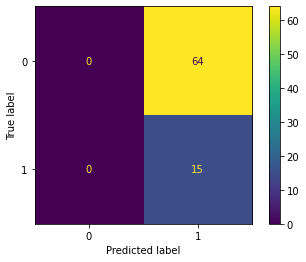

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

### 13. KNN for Kbest 30

In [80]:
#Scaling upsampled data
scaler4 = MinMaxScaler()  
scaler4.fit(X_train_kb30)

X_train_kb30scale = scaler4.transform(X_train_kb30)
                                     
knn4 = KNeighborsClassifier(n_neighbors=11)

knn4.fit(X_train_kb30scale, y_train_up)

y_pred_test =knn4.predict(X_test_kb30)
y_pred_train = knn4.predict(X_train_kb30scale)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.21518987341772153
Train Accuracy score:  0.833984375
Test F1 score:  0.32608695652173914
Train F1 score:  0.8428835489833642
Test Recall score:  1.0
Train Recall score:  0.890625


In [81]:
results['13. knn4_kb30'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4),
                            round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333),
 '10. knn_upscaled': (0.5696, 0.32, 0.5333),
 '11. knn2_imbscaled': (0.6582, 0.2667, 0.2667),
 '12. knn3_kb25': (0.1899, 0.3191, 1.0),
 '13. knn4_kb30': (0.2152, 1.0, 1.0)}

### 14.Decision Tree Classifier

In [82]:
dtc1 = DecisionTreeClassifier(max_depth=10)

#Train Decision Tree Classifier
dtc1.fit(X_train_up,y_train_up)

#predict the training set
y_pred_train = dtc1.predict(X_train_up)

#Predict the response for test dataset
y_pred_test = dtc1.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, y_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, y_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, y_pred_train))

Test Accuracy score:  0.8227848101265823
Train Accuracy score:  1.0
Test F1 score:  0.5
Train F1 score:  1.0
Test Recall score:  0.4666666666666667
Train Recall score:  1.0


In [83]:
results['14. dtc1_imbalanced'] = (round(metrics.accuracy_score(y_test, y_pred_test),4), 
                             round(metrics.f1_score(y_test, y_pred_test),4), 
                             round(metrics.recall_score(y_test, y_pred_test),4))
results

{'1.lr_baseline': (0.8101, 0.3478, 0.2667),
 '2. lr_upsampled': (0.7215, 0.4762, 1),
 '3.  lr_upscaled': (0.7215, 0.3529, 0.5547),
 '4. lr_kb10': (0.7215, 0.45, 0.6),
 '5. lr_kb15': (0.6835, 0.3902, 0.5333),
 '6.lr_kb20': (0.7089, 0.4103, 0.5333),
 '7. lr_kb25': (0.6582, 0.3721, 0.5333),
 '8. lr_kb30': (0.6962, 0.4, 0.5333),
 '9. lr_kb35': (0.7342, 0.5116, 0.7333),
 '10. knn_upscaled': (0.5696, 0.32, 0.5333),
 '11. knn2_imbscaled': (0.6582, 0.2667, 0.2667),
 '12. knn3_kb25': (0.1899, 0.3191, 1.0),
 '13. knn4_kb30': (0.2152, 1.0, 1.0),
 '14. dtc1_imbalanced': (0.8228, 0.5, 0.4667)}

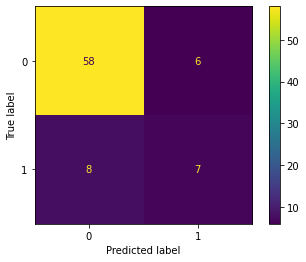

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Final Model

In [85]:
kb10_lr = LogisticRegression(solver='liblinear')


kb10_lr.fit(X_train_kb10, y_train_up)


kb10_pred_test = kb10_lr.predict(X_test_kb10)
kb10_pred_train = kb10_lr.predict(X_train_kb10)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, kb10_pred_test))
print('Train Accuracy score: ', metrics.accuracy_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test F1 score: ', metrics.f1_score(y_test, kb10_pred_test))
print('Train F1 score: ', metrics.f1_score(y_train_up, kb10_pred_train))

# checking accuracy
print('Test Recall score: ', metrics.recall_score(y_test, kb10_pred_test))
print('Train Recall score: ', metrics.recall_score(y_train_up, kb10_pred_train))

Test Accuracy score:  0.7215189873417721
Train Accuracy score:  0.783203125
Test F1 score:  0.45
Train F1 score:  0.7730061349693251
Test Recall score:  0.6
Train Recall score:  0.73828125


In [86]:
features = list(X_train_kb10.columns)
coeffs = (kb10_lr.coef_)[0].tolist()
feat_coeff=list(zip(features, coeffs))
feat_coeff

[('sex', -1.8299403461784516),
 ('address', 1.3553367588098806),
 ('schoolsup', -0.6057182514692955),
 ('famsup', -0.4798831204698834),
 ('academic_support', -0.012217246990408537),
 ('idle', 0.032808738995829145),
 ('studytime_3', -0.7788959837136527),
 ('goout_3', -0.12193580639163415),
 ('goout_4', 1.6601721730040024),
 ('goout_5', 1.5310299945277592)]

**Interpretation of coefficients**

1. **sex:** -1.62 is interpreted as the expected decrease in log odds for a female student being a heavy drinker. The odds ratio here is 1, which suggests that the chances of a female student being a heavy drinker is less likely to occur
2. **absences:** 0.079 is interpreted as the expected change in log odds for a one- unit increase in absences
3. **G1:** -0.19 is interpreted as the expected decrease in log odds of a heavy drinker
4. **G2:** 0.027 is interpreted as the expected increease in log odds of a heavy drinker
5. **G3:** -0.01 is interpreted as the expected decrease in log odds of heavy drinker
6. **idle:** 0.028 is interpreted as the expected increease in log odds of a student being a heavy drinker
7. **grade_avg:** -0.039 is interpreted as the expected decrease in log odds of a student being a heavy drinker
8. **goout_2:** -0.65 is interpreted as the expected decrease in log odds of a student being a heavy drinker
9. **goout_3:** -0.57 is interpreted as the expected decrease in log odds of a student being a heavy drinker
10. **goout_5:** 1.05 is interpreted as the expected increase in log odds of a student being a heavy drinker

<BarContainer object of 10 artists>

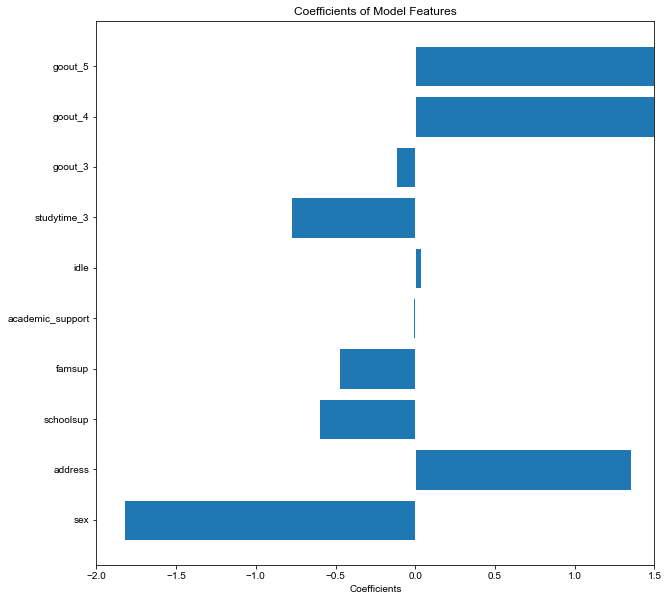

In [87]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style('darkgrid')
plt.title('Coefficients of Model Features')
plt.xlabel('Coefficients')
plt.xlim(-2, 1.5)
plt.barh(y= features, width = coeffs)


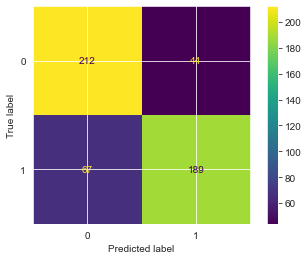

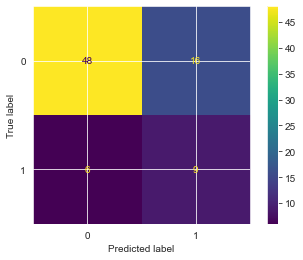

In [88]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, kb10_pred_test)

# cm_display = ConfusionMatrixDisplay(cm).plot()
# plt.savefig('images/Confusion_matrix.png')
metrics.plot_confusion_matrix(kb10_lr, X_train_kb10, y_train_up)
metrics.plot_confusion_matrix(kb10_lr, X_test_kb10, y_test)

**Confusion Matrix Observation:**

* True Positives : 19
* True Negatives : 90
* False Positives :14
* False Negatives : 9

The Recall Score of 0.6538 for this model tells us that the model predict an actual positive correctly 65% of the time.

In [89]:
# Features of the model with the next best Recall score
X_train_kb25.columns

Index(['sex', 'age', 'address', 'schoolsup', 'famsup', 'romantic', 'stability',
       'academic_support', 'idle', 'Mjob_5', 'reason_2', 'reason_4',
       'traveltime_4', 'studytime_3', 'studytime_4', 'failures_3', 'famrel_2',
       'freetime_3', 'freetime_4', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'health_3', 'health_5'],
      dtype='object')